# Spectral Analysis Project

The aim of this project is to explore how information from galactic spectra can be extracted using machine learning and how it can determine important physical quantities.


In [223]:
# Importing libraries
# Basics 
import pandas as pd
import numpy as np
from scipy import stats

# Visualizaton 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## EDA - Exploratory data analysis 

### The dataset 

Downolading the raw dataset I created and downloaded with the CasJobs interface as a csv file. 
The dataset is not filtered and cleaned, and so we proceed with the cleaning and the EDA.

The dataset is the result of the merging of SpecObj and PhotoObj tables on the same attribute (specObjID) : 
- PhotoObj contains Photometric data
- SpecObj contains spectroscopic data

In [224]:
# Converting the csv into a pandas dataframe 
raw_df = pd.read_csv('/Users/emmatosato/Documents/UNI/Erasmus/Data Mining and Machine Learning/Spectral-AnalysisProject/SDSS_dataset.csv')

### Raw dataset insights

In [225]:
raw_df.shape

(10000, 704)

In [226]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 704 entries, objID to img
dtypes: float64(557), int64(132), object(15)
memory usage: 53.7+ MB


In [227]:
raw_df.head(100)

objID  skyVersion   run  rerun  camcol  field  obj  mode  \
0   1237674650460684416           2  6793    301       4     55  128     1   
1   1237674650460684446           2  6793    301       4     55  158     1   
2   1237674650460684511           2  6793    301       4     55  223     1   
3   1237674650460684544           2  6793    301       4     55  256     1   
4   1237674650460749979           2  6793    301       4     56  155     1   
..                  ...         ...   ...    ...     ...    ...  ...   ...   
95  1237648720141877432           2   756    301       1    198  184     1   
96  1237648720141877472           2   756    301       1    198  224     1   
97  1237648720141943039           2   756    301       1    199  255     1   
98  1237648720141943050           2   756    301       1    199  266     1   
99  1237648720141943100           2   756    301       1    199  316     1   

    nChild  type  ...  elodieLogG  elodieFeH   elodieZ  elodieZErr  \
0        0     6  ...        4.49       -1.7  0.000024    0.000008   
1        0     3  ...        0.00        0.0  0.000000    0.000000   
2        0     3  ...        0.00        0.0  0.000000    0.000000   
3        0     3  ...        0.00        0.0  0.000000    0.000000   
4        0     3  ...        0.00        0.0  0.000000    0.000000   
..     ...   ...  ...         ...        ...       ...         ...   
95       0     3  ...        0.00        0.0  0.000000    0.000000   
96       0     3  ...        0.00        0.0  0.000000    0.000000   
97       0     3  ...        0.00        0.0  0.000000    0.000000   
98       0     3  ...        0.00        0.0  0.000000    0.000000   
99       0     3  ...        0.00        0.0  0.000000    0.000000   

    elodieZModelErr  elodieRChi2  elodieDOF         Column9  Column10  \
0          0.000002     0.889679       2137  15401755927646      5067   
1          0.000000     0.000000          0  15449011177454      5067   
2          0.000000     0.000000          0  15448999163844      5067   
3          0.000000     0.000000          0  15401755241894      5067   
4          0.000000     0.000000          0  15401766686400      5067   
..              ...          ...        ...             ...       ...   
95         0.000000     0.000000          0  10522837970854      5067   
96         0.000000     0.000000          0  10523572792087      5067   
97         0.000000     0.000000          0  10522853496825      5067   
98         0.000000     0.000000          0  10522845005953      5067   
99         0.000000     0.000000          0  10522848797314      5067   

              img  
0   System.Byte[]  
1   System.Byte[]  
2   System.Byte[]  
3   System.Byte[]  
4   System.Byte[]  
..            ...  
95  System.Byte[]  
96  System.Byte[]  
97  System.Byte[]  
98  System.Byte[]  
99  System.Byte[]  

[100 rows x 704 columns]

In [228]:
raw_df.tail(10)

objID  skyVersion   run  rerun  camcol  field  obj  mode  \
9990  1237674650460356844           2  6793    301       4     50  236     1   
9991  1237674650460553274           2  6793    301       4     53   58     1   
9992  1237674650460422277           2  6793    301       4     51  133     1   
9993  1237674650460553318           2  6793    301       4     53  102     1   
9994  1237674650460750003           2  6793    301       4     56  179     1   
9995  1237674650460422444           2  6793    301       4     51  300     1   
9996  1237674650460553354           2  6793    301       4     53  138     1   
9997  1237674650460553364           2  6793    301       4     53  148     1   
9998  1237674650460553396           2  6793    301       4     53  180     1   
9999  1237674650460618904           2  6793    301       4     54  152     1   

      nChild  type  ...  elodieLogG  elodieFeH  elodieZ  elodieZErr  \
9990       0     3  ...         0.0        0.0      0.0         0.0   
9991       0     3  ...         0.0        0.0      0.0         0.0   
9992       0     3  ...         0.0        0.0      0.0         0.0   
9993       0     3  ...         0.0        0.0      0.0         0.0   
9994       0     3  ...         0.0        0.0      0.0         0.0   
9995       0     3  ...         0.0        0.0      0.0         0.0   
9996       0     3  ...         0.0        0.0      0.0         0.0   
9997       0     3  ...         0.0        0.0      0.0         0.0   
9998       0     3  ...         0.0        0.0      0.0         0.0   
9999       0     6  ...         0.0        0.0      0.0         0.0   

      elodieZModelErr  elodieRChi2  elodieDOF         Column9  Column10  \
9990              0.0          0.0          0  15431855202684      5067   
9991              0.0          0.0          0  15431826462671      5067   
9992              0.0          0.0          0  15431857736234      5067   
9993              0.0          0.0          0  15431881131486      5067   
9994              0.0          0.0          0  15401768998482      5067   
9995              0.0          0.0          0  15431865054797      5067   
9996              0.0          0.0          0  15431827378494      5067   
9997              0.0          0.0          0  15431830114914      5067   
9998              0.0          0.0          0  15431827585021      5067   
9999              0.0          0.0          0  15448997512553      5067   

                img  
9990  System.Byte[]  
9991  System.Byte[]  
9992  System.Byte[]  
9993  System.Byte[]  
9994  System.Byte[]  
9995  System.Byte[]  
9996  System.Byte[]  
9997  System.Byte[]  
9998  System.Byte[]  
9999  System.Byte[]  

[10 rows x 704 columns]

### Null values 

In [229]:
# Check the NaN values in the datset
v = raw_df.isnull().sum()

# Mask for finding the non zero values in the v vector crated (so the columns which contain NaN values)
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

run1d              10000
subClass            5299
class_noqso        10000
subClass_noqso     10000
comments_person    10000
tFile                 11
elodieFileName      9138
elodieObject        9138
elodieSpType        9138
dtype: int64

I will drop the run1d, class_noqso, subClass_noqso and comments_person because all the rows are NaN values. I will delete also the subClass, elodieFileName, elodieObject and elodieSpType because the contain too many null values too.

The tFile attribute has only 11 NaN values, so i will directly drop the 11 rows that have this attribute null instead of imputing the missing values (tFile is a column which contains the *"File name of best fit template source"*). Since i have a large dataset, this action should not influence the analysis.

In [230]:
# Dropping the columns
df = raw_df.copy()
df.drop(columns=['run1d', 'subClass', 'class_noqso', 'subClass_noqso', 'comments_person', 'elodieFileName', 'elodieObject', 'elodieSpType'], inplace = True)

In [231]:
# Dropping the rows
df.dropna(inplace= True)

In [232]:
# Cheking if everthing worked well
v = df.isnull().sum()
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

Series([], dtype: int64)

In [233]:
df.shape

(9989, 696)

### Duplicated rows

With this step, no duplicate rows should be found, because the dataset should already be full of unique objects.

In [234]:
df[df.duplicated() == True]

Empty DataFrame
Columns: [objID, skyVersion, run, rerun, camcol, field, obj, mode, nChild, type, clean, probPSF, insideMask, flags, rowc, rowcErr, colc, colcErr, rowv, rowvErr, colv, colvErr, rowc_u, rowc_g, rowc_r, rowc_i, rowc_z, rowcErr_u, rowcErr_g, rowcErr_r, rowcErr_i, rowcErr_z, colc_u, colc_g, colc_r, colc_i, colc_z, colcErr_u, colcErr_g, colcErr_r, colcErr_i, colcErr_z, sky_u, sky_g, sky_r, sky_i, sky_z, skyIvar_u, skyIvar_g, skyIvar_r, skyIvar_i, skyIvar_z, psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z, psfMagErr_u, psfMagErr_g, psfMagErr_r, psfMagErr_i, psfMagErr_z, fiberMag_u, fiberMag_g, fiberMag_r, fiberMag_i, fiberMag_z, fiberMagErr_u, fiberMagErr_g, fiberMagErr_r, fiberMagErr_i, fiberMagErr_z, fiber2Mag_u, fiber2Mag_g, fiber2Mag_r, fiber2Mag_i, fiber2Mag_z, fiber2MagErr_u, fiber2MagErr_g, fiber2MagErr_r, fiber2MagErr_i, fiber2MagErr_z, petroMag_u, petroMag_g, petroMag_r, petroMag_i, petroMag_z, petroMagErr_u, petroMagErr_g, petroMagErr_r, petroMagErr_i, petroMagErr_z, psfFlux_u, psfFlux_g, psfFlux_r, psfFlux_i, psfFlux_z, psfFluxIvar_u, psfFluxIvar_g, psfFluxIvar_r, ...]
Index: []

[0 rows x 696 columns]

### Data exploration

On the skyserver website it is possible to access to useful informations and explanations of the SDSS data. 
On this link you can find the description of all the columns of the dataset, both for SpecObj and PhotoObj tables, which I merged before the downolading : https://skyserver.sdss.org/dr18/MoreTools/browser

I will select a subset of columns i found relevant for data exploration.

#### Type attribute

In the table *PhotoObj* the **type** column is the: type classification of the object (star, galaxy, cosmic ray, etc.). This column typically provides the overall or general classification of an astronomical object based on its spectral characteristics and other properties.

In [235]:
df['type'].value_counts()

3    8613
6    1363
0      13
Name: type, dtype: int64

Type:
- 3 = Galaxy 
- 6 = Star
- 0 = Unknown

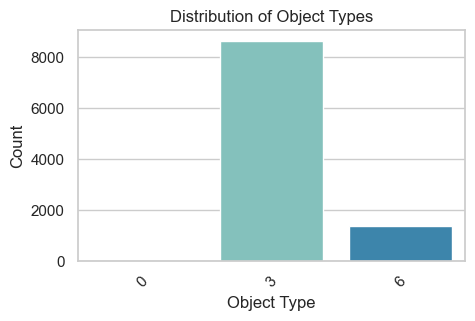

In [236]:
plt.figure(figsize=(5, 3))  # Optional: Adjust the figure size
sns.countplot(data=df, x='type', palette = 'GnBu')
plt.title("Distribution of Object Types")
plt.xlabel("Object Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In the table *PhotoObj* the **type_u** column is the: object type classification per band, which classificates based on observations made in specific wavelength bands. It should allow a more detailed analysis. Let's compare the 2 attributes.

In [237]:
# Concatenate the two Series into a DataFrame
types_df = pd.concat([df['type'].value_counts(), df['type_u'].value_counts()], axis=1)

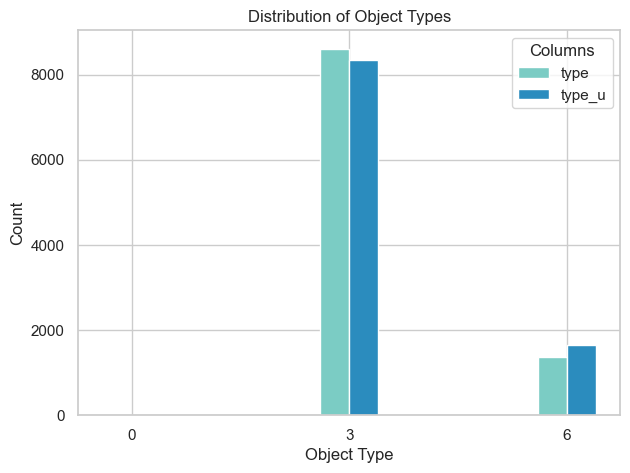

In [238]:
# Create a bar plot
plt.figure(figsize=(7, 5))

# Set the positions for the bars for 'type' and 'type_u'
bar_width = 0.4  # Width of each bar
index = types_df.index
index_type_u = [i + bar_width for i in index]

# Plot 'type' and 'type_u' counts side by side
plt.bar(index, types_df['type'], width=bar_width, color='#7bccc4', label='type')
plt.bar(index_type_u, types_df['type_u'], width=bar_width, color='#2b8cbe', label='type_u')

# Customize the plot
plt.title("Distribution of Object Types")
plt.xlabel("Object Type")
plt.ylabel("Count")
plt.legend(title="Columns")
plt.xticks(index + bar_width / 2, index)  # Position x-axis labels between bars

# Show the plot
plt.show()


We can see only a little difference.

#### Red shift attribute (z)

First, I will look for outliers.

In [239]:
# Calculate Z-scores on the 'z' column
z_scores = stats.zscore(df['z'])

# Identify outliers based on Z-scores
outliers = (z_scores > 3) | (z_scores < -3)

In [240]:
# Outliers
df[outliers == True]['z'].value_counts()

-9999.0    16
Name: z, dtype: int64

A redshift value of -9999 is typically used as sentinel value to indicate missing or undefined data in the context of astronomical observations.

When you encounter a redshift value of -9999, it generally means one of the following:
- Missing Data
- Placeholder Value
- Data Quality Flag

In summary, a redshift value of -9999 is not a valid redshift measurement but rather a way to handle missing or problematic data in astronomical datasets.

For these reasons, we delete the rows which contain this value for the redshift.

In [241]:
# Drop rows corresponding to outliers
df.drop(df[outliers].index, inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

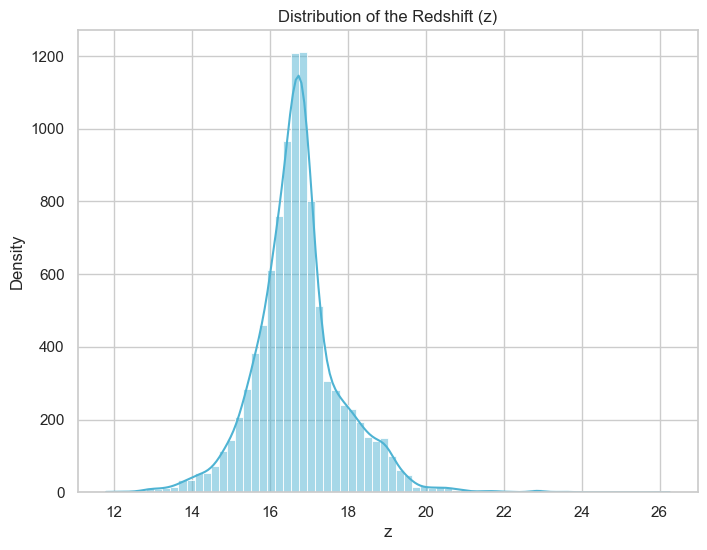

In [242]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a distribution plot using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['z'], bins=70, color = '#4eb3d3', kde=True)
plt.title("Distribution of the Redshift (z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

#### Magnitude attributes

Here box plots are created to visualize the distribution of various magnitude columns, in order to find the eventual outliers.

I reported different types of magnitudes that are used in astronomical analysis to account for the diverse characteristics of celestial objects and the variations in their light profiles. We have:
- Point Spread Function Magnitude 
- Petrosian Magnitude
- de Vaucouleurs Magnitude
- Exponential Fit Magnitude
- Model Magnitude 
- Composite Model Magnitude

In [243]:
# Specify the columns for which you want to create box plots
columns_to_check = ['psfMag_u',  'petroMag_u', 'deVMag_u', 'expMag_u', 'modelMag_u', 'cModelMag_u']

# Create a DataFrame containing the specified columns
boxplot_df = df[columns_to_check]

# Create a box plot using Plotly with the custom blue color palette
fig = px.box(boxplot_df, y=boxplot_df.columns)
fig.update_traces(marker=dict(color='#3ea2b5'))

fig.update_layout(
    title="Box Plots of Magnitude Distributions",
    yaxis_title="Magnitude",
    xaxis_title=None,  # Remove x-axis label for better spacing
)
fig.show()

Here we drop the outliers. I stored in a dictionary the outliers for each column (values and total amount)

In [244]:
# Create a dictionary to store outliers for each column
outliers_dict = {}
no_outliers_df = df.copy()

# Loop through each column and save outliers in a DataFrame
for col in columns_to_check:
    z_scores = stats.zscore(no_outliers_df[col])
    outliers = (z_scores > 3) | (z_scores < -3)
    outliers_df = no_outliers_df[outliers == True][[col]]
    outliers_dict[col] = outliers_df

    # Remove outliers from the original DataFrame
    no_outliers_df.drop(no_outliers_df[outliers].index, inplace=True)

# Reset the index of the DataFrame
no_outliers_df.reset_index(drop=True, inplace=True)

# Print or analyze the outliers for each column as needed
#for col, outliers_df in outliers_dict.items():
    #print(f"Column: {col}, Number of Outliers: {len(outliers_df)}")
    #print(outliers_df.head(), '\n')  # Print the first few rows of outliers DataFrame


The boxplots agains, without the outliers.

In [245]:
# Create a DataFrame containing the specified columns
boxplot_df = no_outliers_df[columns_to_check]

# Create a box plot using Plotly with the custom blue color palette
fig = px.box(boxplot_df, y=boxplot_df.columns)
fig.update_traces(marker=dict(color='#3ea2b5'))

fig.update_layout(
    title="Box Plots of Magnitude Distributions",
    yaxis_title="Magnitude",
    xaxis_title=None,  # Remove x-axis label for better spacing
)
fig.show()

#### Heatmap

I tried to compute the heatmap for some attributes, but first i have to encode the categorical variables.

In [246]:
# Definitions+
df_encoded = df.copy()
label_encoder = LabelEncoder()

# Selecting the categorical variables 
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and encode it
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


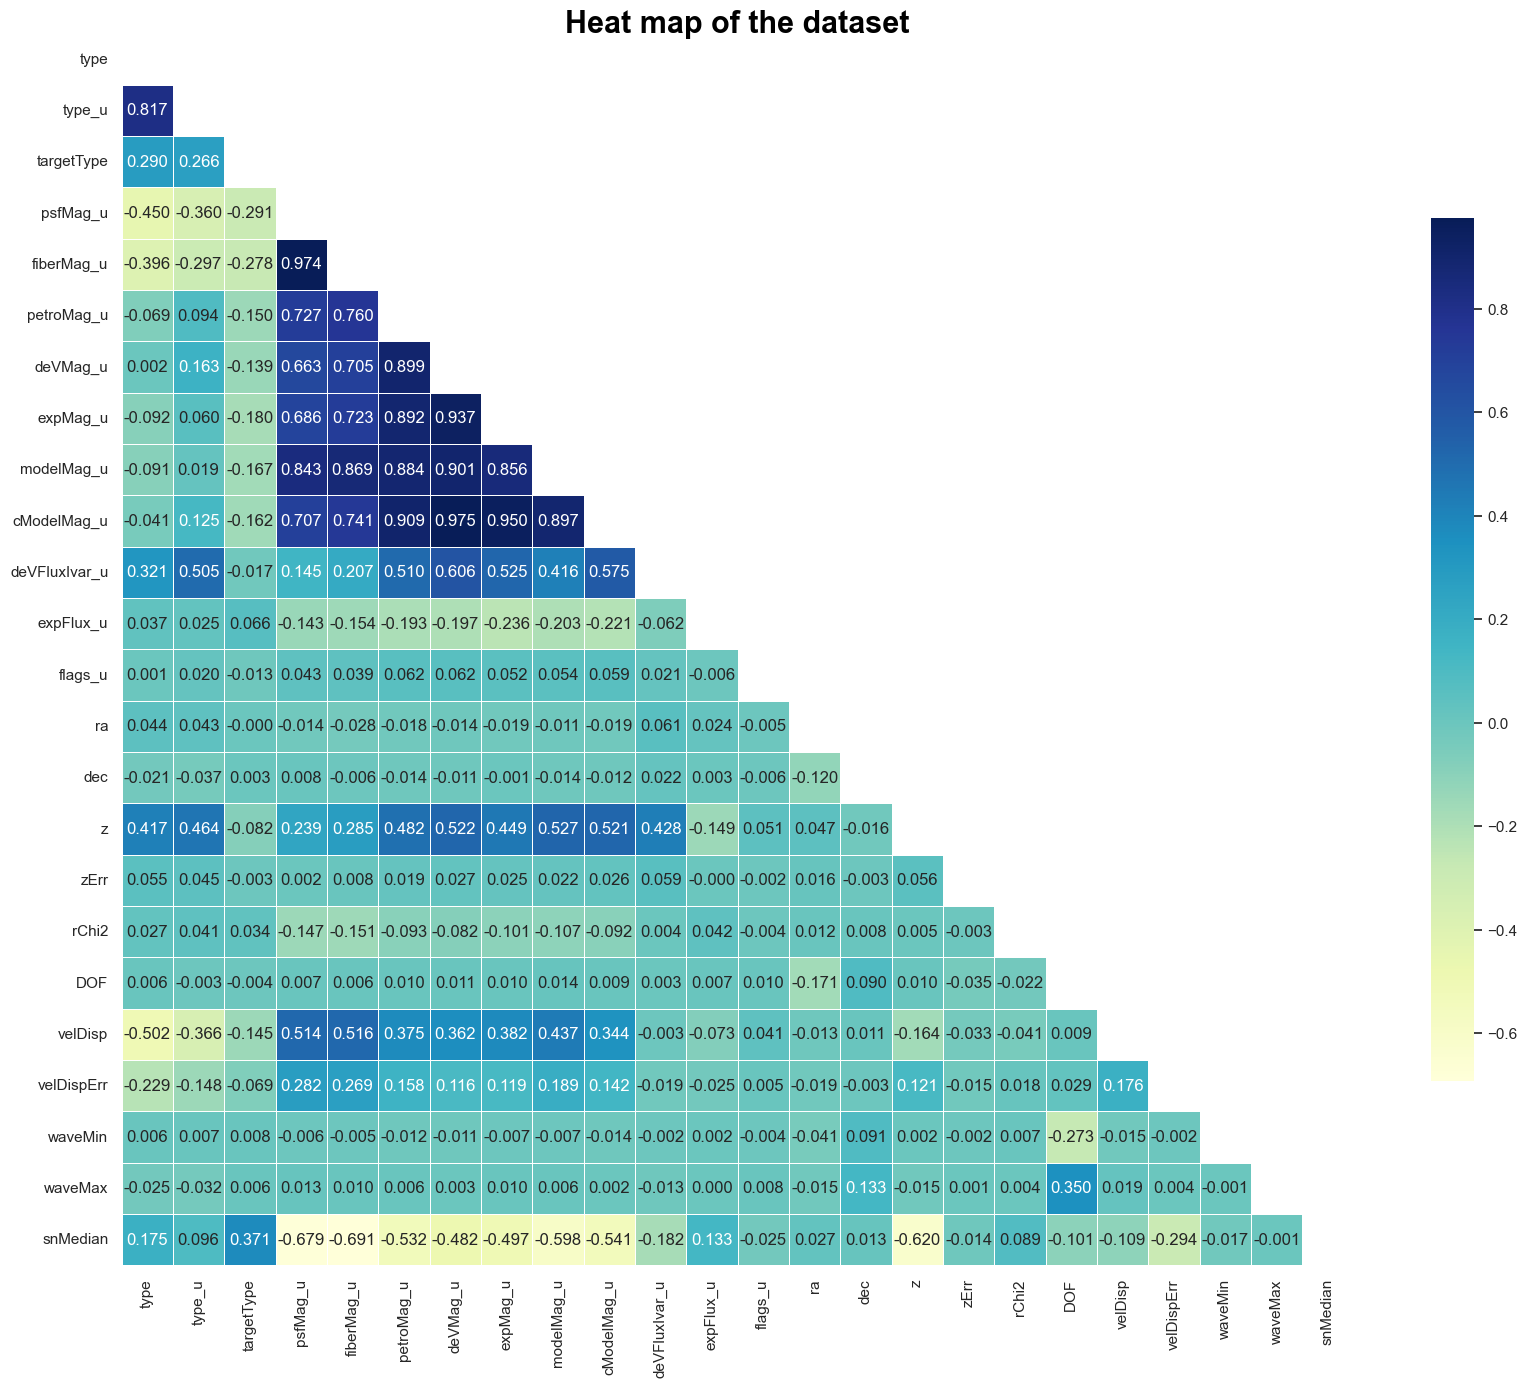

In [247]:
# Selected columns
heatmap_columns = [
    'type', 'type_u', 'targetType',
    'psfMag_u', 'fiberMag_u', 'petroMag_u', 'deVMag_u', 'expMag_u', 'modelMag_u', 'cModelMag_u',
    'deVFluxIvar_u', 'expFlux_u', 'flags_u', 
    'ra', 'dec','z', 'zErr', 'rChi2', 'DOF', 
    'velDisp','velDispErr', 
    'waveMin', 'waveMax', 'snMedian'
]

# Standardization
scaler = StandardScaler()
df_encoded[heatmap_columns] = scaler.fit_transform(df_encoded[heatmap_columns])

# Compute the correlation matrix
corr = df_encoded[heatmap_columns].corr(numeric_only= False)

# The mask for lower left triangle 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# The plot 
fig1, ax1 = plt.subplots( figsize=(20, 16) )

# Heatmap
sns.heatmap(corr,  cmap = 'YlGnBu', annot = True, fmt=".3f", 
           linewidth=.5, cbar_kws={ 'orientation': 'vertical', 'shrink': 0.7 } , square=True, mask= mask,)
# Title
ax1.set_title("Heat map of the dataset", fontsize= 22, fontweight= 'heavy', color = 'black', pad= 0.7)

plt.show()

We see that the highest positive value are those between the magnitudes, as they are obviously related. We can notice that the redshift have weak correlations with some attributes, anyway the plot it is not so significative. Maybe after a dimensionality reduction and a more smart choiche of the most significatve variables, we coudl have better results.

## Dimensionality reduction

### PCA

Extract the features (independent variables) and standardize the data

In [248]:
# Extract the selected features into X
X = df_encoded.copy()

# MANCA: drop the target variable

# Standardize the data to have a mean of ~0 and a variance of 1
X = StandardScaler().fit_transform(X)

Before applying the actual PCA, in want to understand the optimal number of principal components for keeping the relevant information and not lose important one.

I will use the scree plot method in which a drop occurs ('elbow') to point out the optimal number of components. The components appearing after the elbow are and the components with relatively high explained variances are kept.

In [265]:
# Create a PCA instance
n_components = 150
pca = PCA(n_components = n_components)

# Fit the pca
principal_components = pca.fit_transform(X)

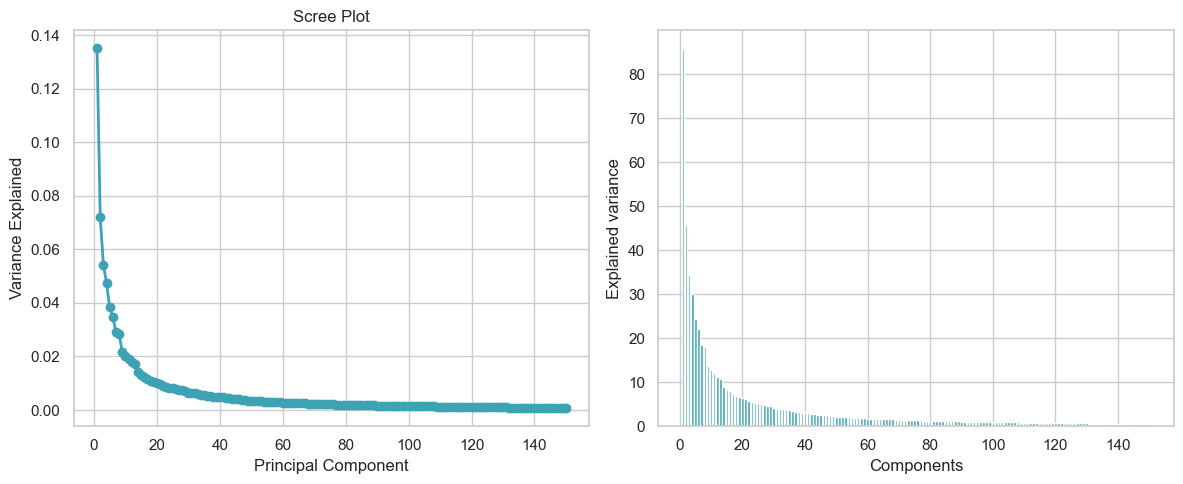

In [266]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first subplot
PC_values = np.arange(pca.n_components_) + 1
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#3ea2b5')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')
ax1.grid(True)

# Plot the second subplot
ax2.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, color='#3ea2b5')
ax2.set_title('Bar Plot')
ax2.set_ylabel('Explained variance')
ax2.set_xlabel('Components')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

Thanks to these 2 plots we can see that the elbow is among 0 and 50 components. Let's re-define the PCA.

In [281]:
# Create a PCA instance
n_components = 50
pca = PCA(n_components = n_components)

# Fit the pca
principal_components = pca.fit_transform(X)

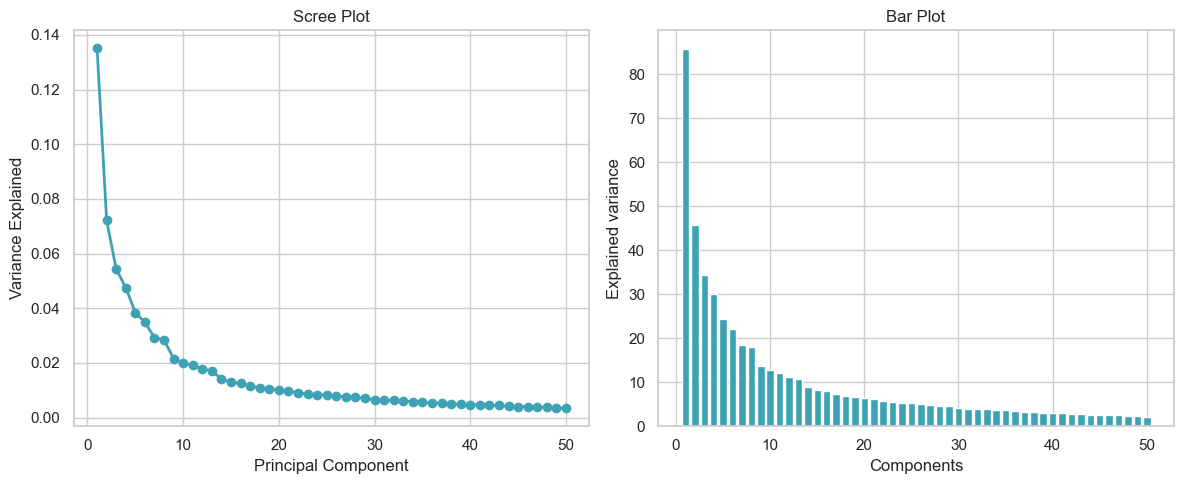

In [282]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first subplot
PC_values = np.arange(pca.n_components_) + 1
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#3ea2b5')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')
ax1.grid(True)

# Plot the second subplot
ax2.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, color='#3ea2b5')
ax2.set_title('Bar Plot')
ax2.set_ylabel('Explained variance')
ax2.set_xlabel('Components')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [286]:
# Computing the cumulative explained variance  
sum = 0
for i in range(30):
    temp = round(pca.explained_variance_ratio_[i]*100, 2)
    sum += temp
print('Variance:', round(sum), '%')

Variance: 70 %


This code computes and prints the cumulative percentage of variance explained by the first 30 principal components, giving you an idea of how much of the total variance in the data is captured by these components.

So, in order to capture at least 70% of the variance, more than 30 components are needed. Increasing till 50 components (the number we selected for the PCA), we can have till 79% of cumulative variance explained.

Since we intended to visualize your data in a more interpretable way, we can select the first three principal components for the visualization.

In [304]:
# plots for visualiztion

### t-SNE